In [42]:
!pip install wordcloud
!pip install langdetect
!pip install contractions
!pip install pyspellchecker
!pip install textblob
!pip install emoji
!pip install xformers


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from langdetect import detect
from tqdm import tqdm
import contractions
from spellchecker import SpellChecker
from wordcloud import WordCloud
import emoji
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to C:\Users\Arda
[nltk_data]     Kaykusuz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arda Kaykusuz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Arda
[nltk_data]     Kaykusuz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
df_train = pd.read_excel('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train.xlsx', index_col='index')
df_test = pd.read_excel('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\test.xlsx', index_col='index')
df_train_reviews = pd.read_excel('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train_reviews.xlsx')
df_test_reviews = pd.read_excel('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\test_reviews.xlsx')

In [45]:
df_train.head(2)

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1


In [46]:
df_train_reviews.head(2)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6248 entries, 1 to 6248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  6248 non-null   object
 1   host_about   6248 non-null   object
 2   unlisted     6248 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 195.2+ KB


In [48]:
df_train_reviews["comments"] = df_train_reviews["comments"].astype(str)
df_train["description"] = df_train["description"].astype(str)
df_train["host_about"] = df_train["host_about"].astype(str)

In [49]:
print(df_train.shape)
print(df_train_reviews.shape)

(6248, 3)
(361281, 2)


# Data Exploration

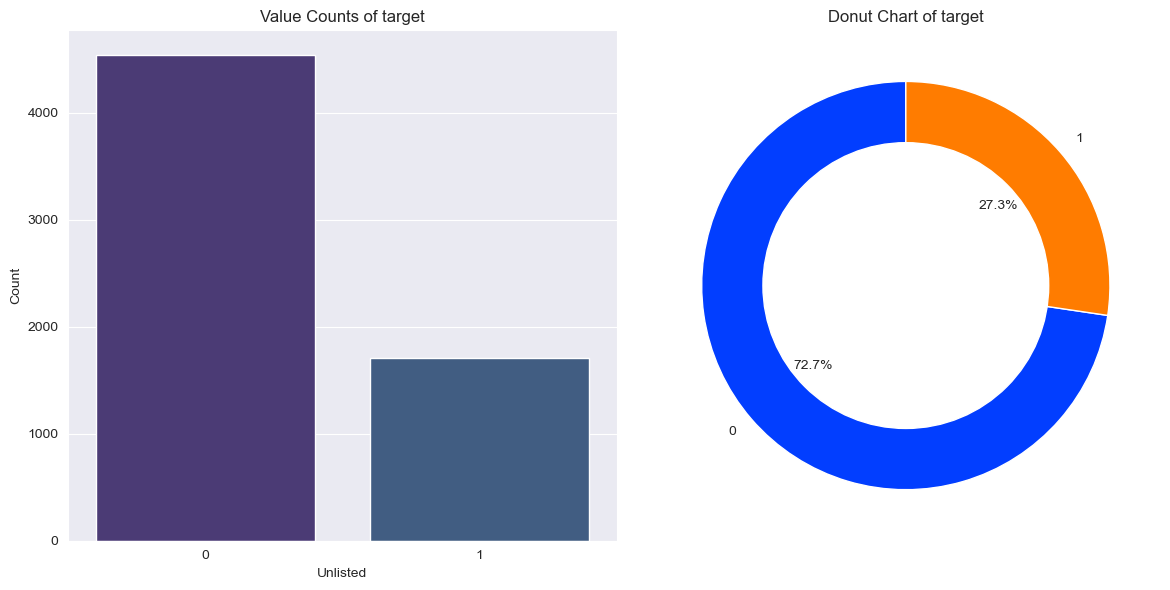

In [50]:

sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df_train, x='unlisted', ax=axs[0])
axs[0].set_xlabel('Unlisted')
axs[0].set_ylabel('Count')
axs[0].set_title('Value Counts of target')
unlisted_counts = df_train['unlisted'].value_counts()
axs[1].pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
axs[1].add_artist(plt.Circle((0,0),0.7,fc='white'))
axs[1].set_title('Donut Chart of target')
plt.tight_layout()
plt.show()


The target variable is pretty unbalanced. 

## Dublicates

In [51]:
duplicated = df_train[df_train.duplicated(subset=['description', 'host_about'])]
duplicate_counts = duplicated.value_counts()
duplicate_counts

description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Description Column

As mentioned before, it is expected that there are repeated property descriptions.

Let's exame the entries that have repeated _description_ but don't have repeated _host_about_ or target variable.

In [52]:
df_train[(df_train['description'].duplicated()) & (~df_train.duplicated())]

,description,host_about,unlisted
index,,,
1354,<b>License number</b><br />Exempt,Profissional e responsável. Sempre disponível....,1
1834,<b>License number</b><br />Exempt,"Spiritualistic Artist, half Brazilian from the...",0
1870,<b>License number</b><br />Exempt,Erlebe und lebe die einzigartige Erfahrung mit...,0
1876,<b>License number</b><br />Exempt,Acessível E Receptivo Sempre disponível para o...,0
1879,<b>License number</b><br />Exempt,"I am 27 years Old, i am Portuguese, I love my ...",1
1925,Enjoy an unique sleeping experience on a saili...,"I`m Pedro, with my 37ys i work around the worl...",0
2305,Enjoy our cozy bedroom in the heart of Bairro ...,"Hello, if you don't see any comments yet it is...",1
2501,<b>License number</b><br />Exempt,Eu chamo-me Osvaldo Carrilhas tenho 35 anos. S...,0
2689,<b>License number</b><br />Exempt,Hello :) I am currently not staying in my Lisb...,0


Interestingly there are couple of HTLM symbols. In the following part they should be removed.

In [53]:
df_train[df_train['host_about'].duplicated() & (~df_train.duplicated())]

,description,host_about,unlisted
index,,,
21,"IMPORTANT: In response to COVID-19, this prope...","Hi, we are Homing - a company that develops it...",0
48,"Hello traveler, if you are looking for the per...","Hi world, my name is João Figueira, I am 35 ye...",1
55,Spacious apartment in the heart of Lisbon. Up ...,We are Feels Like Home Holiday Rentals.\nA com...,0
72,This room is elegantly and functionally decora...,Sou uma pessoa otimista que vive a vida com a ...,0
75,"IMPORTANT: In response to COVID-19, this prope...",Homing has become one of the largest and most ...,0
...,...,...,...
6240,Comfortable and cozy are the main words to des...,Founded by travel enthusiasts (just like you) ...,0
6241,My Cozy Studio is very practical and especiall...,Hello!_x000D_\nI m Portuguese and i love to me...,1
6243,70 sqm apartment in a very good neighborhood o...,Lisboeta de gema. Adoro viajar. Já morei em Ro...,1


In [54]:
df_train['host_about'].nunique()

2803

Comments Column

As we can see below, there very common comments.

In [55]:
df_train_reviews[df_train_reviews['comments'].duplicated()]

,index,comments
682,16,.
822,19,👍
1001,23,Great place!
1244,25,.
1651,31,.
...,...,...
361235,6248,Alles ok
361243,6248,Recomendo vivamente.
361245,6248,Très bon séjour
361246,6248,Boa estadia


There are couple of punctuations and emojis. In the following part they will define and handle them.

## Missing Values

In [56]:
missing_data_info = [
    (df_train, 'description', 'Missing descriptions:'),
    (df_train, 'host_about', 'Missing host_about:'),
    (df_train_reviews, 'comments', 'Missing reviews:')
]
for df, column, message in missing_data_info:
    print(f'{message} {df[column].isna().sum()}')


Missing descriptions: 0
Missing host_about: 0
Missing reviews: 0



In the short context there are couple of features which are useless. In the rest of the part we will remove them. And it seems also HTML signs are everywhere.

In [57]:
df_train.loc[:20, 'description'].str[-40:]

index
1     /b><br />All rooms have key-card access.
2     espaço é bom para aventuras individuais.
3     l de Belém), the Carriage Museum (Museu 
4     br /><b>License number</b><br />91107/AL
5     br /><b>License number</b><br />81300/AL
6      services:<br /><br />- Despesas Consumo
7     ><br /><b>License number</b><br />Exempt
8     br /><b>License number</b><br />69136/AL
9     br /><b>License number</b><br />68527/AL
10    br /><b>License number</b><br />80419/AL
11    c 28-2 minutes. The street has a cafe wh
12    ery special place to stay either in fami
13    agem antes da hora de check-in e após a 
14    Watertap with filter.<br />Bedlinen, tow
15    br /><b>License number</b><br />88579/AL
16    iends, allowing you to fit everybody wit
17    separate units located in the hotel-styl
18    Cascais.<br /><br />All major interests 
19    br /><b>License number</b><br />64232/AL
20    br /><b>License number</b><br />42388/AL
Name: description, dtype: object

As mentioned above, there are losts of <>License number<> text. Let's look at some of them.

In [58]:
df_train[df_train['description'].str.startswith('<b>License number</b><br />')]

,description,host_about,unlisted
index,,,
282,<b>License number</b><br />43084/AL,A GalanteVasques Luxury Tourism nasceu da vont...,0
654,<b>License number</b><br />37710/AL,"Gosto de praia, espectaculos, musica e gastron...",1
714,<b>License number</b><br />92019/AL,"I'm chronic nomad since 2008, currently live i...",1
747,<b>License number</b><br />Exempt,Honesta e atenciosa,0
900,<b>License number</b><br />6005/al,"Ola, sou o Vagner amo viajar, trabalho bastan...",0
...,...,...,...
5770,<b>License number</b><br />45360/AL,"Ola, sou o Vagner amo viajar, trabalho bastan...",1
5870,<b>License number</b><br />60911/AL,In love with life. I’m an avid traveler myself...,0
5966,<b>License number</b><br />48184/AL,sss,0


In [59]:
df_train[df_train['host_about'].apply(lambda x: len(x) < 20)].iloc[:40, 1]

index
19                         
33          With You Suites
86                     \n\n
93                        .
111               _x000D_\n
120      Muito comunicativo
182           Sports person
186                      . 
194              @ZMPoppe\n
304       Erasmus in Lisbon
306       Marta & Catarina 
327        Hello, \nWelcome
334      Muito comunicativo
352                   自驾游晚期
373                       s
375                       -
429     Welcome To My Home 
463                     ...
477                  Dalma 
515                  Alfama
521           Happy couple.
585                      :)
591      João's Apartments 
615                Friendly
629              Life lover
635                     ...
651                     ...
677                   超级三脚猫
684           já mencionado
729                    \n\n
752           Atalho solene
759             Tudo de Bom
778               _x000D_\n
799                    \n\n
808               _x000D_\n
894           

Interestingly there are diffrerent other signs in this columns.

In [60]:
different_signs= ['_x000D_\n', ' ', '.', '-', '_', '...', '_x000D_\n', '\n', '!']
df_train[df_train['host_about'].isin(different_signs)]

,description,host_about,unlisted
index,,,
93,<b>Other things to note</b><br />For your info...,.,1
111,Quarto individual acolhedor com mesa de trabal...,_x000D_\n,0
375,"<b>The space</b><br />Cozy apartment (bedroom,...",-,0
463,O apartamento fica em um bairro típico de Lisb...,...,1
635,A sua família ficará perto de tudo quando fica...,...,1
651,Small confortable and fully equipped flat in m...,...,0
778,Se estas a caminho de Lisboa para continuar co...,_x000D_\n,0
808,Quarto confortável com 1 cama de casal na Ave...,_x000D_\n,0
894,"Amplo quarto bastante iluminado, com mesas de ...",_x000D_\n,0


We need to get rid of all of them. In preprocessing section, we are going to remove all useless text.

In [61]:
df_train_reviews[df_train_reviews['comments'].apply(lambda x: len(str(x)) < 10)].head(20)

,index,comments
1,1,good<br/>
39,1,top
275,9,.
317,11,I
432,11,👍
580,16,Good
590,16,Let me
682,16,.
698,16,q
749,19,Excelente


Thre are short explanations and emojis in this column. Actually, instead of removing emojis we can use for them for our analysis. Because emojis play important role today's communication style. In this analysis we will use emoji library.

In [62]:
short_words=['good', 'top', 'ok', 'bom', 'nice', 'love', 'like']
short_expressions= df_train_reviews[df_train_reviews['comments'].apply(lambda x: len(str(x)) < 5 and str(x).lower() not in short_words and emoji.emoji_count(str(x))==0)]
short_expressions

,index,comments
275,9,.
317,11,I
682,16,.
698,16,q
1129,25,-
...,...,...
359303,6216,.
359456,6221,1
359527,6221,5/5
359648,6221,Nan


Comments per Property

c:\Users\Arda Kaykusuz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


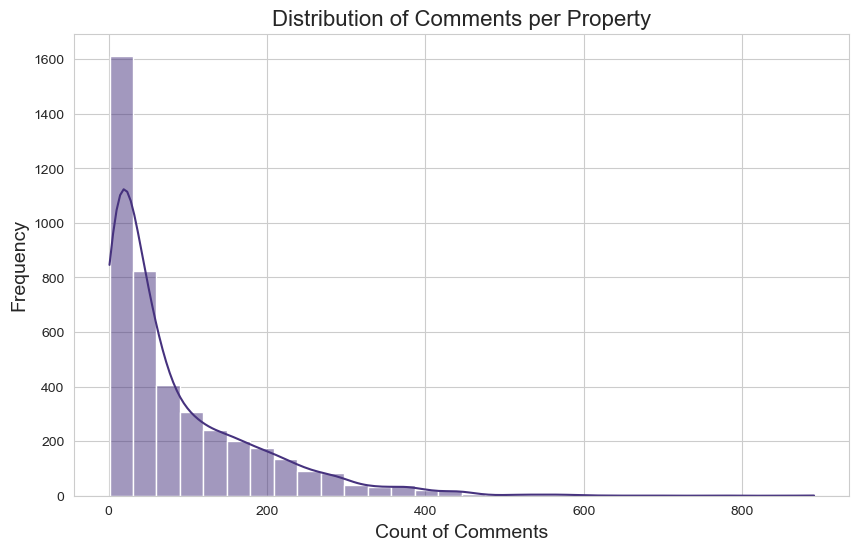

In [63]:
sns.set_style("whitegrid")
sns.set_palette("viridis")
comments_count = df_train_reviews.groupby('index').count()['comments']
plt.figure(figsize=(10, 6))
sns.histplot(data=comments_count, kde=True, bins=30)
plt.xlabel('Count of Comments', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Comments per Property', fontsize=16)
plt.grid(True)
plt.show()

c:\Users\Arda Kaykusuz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Arda Kaykusuz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


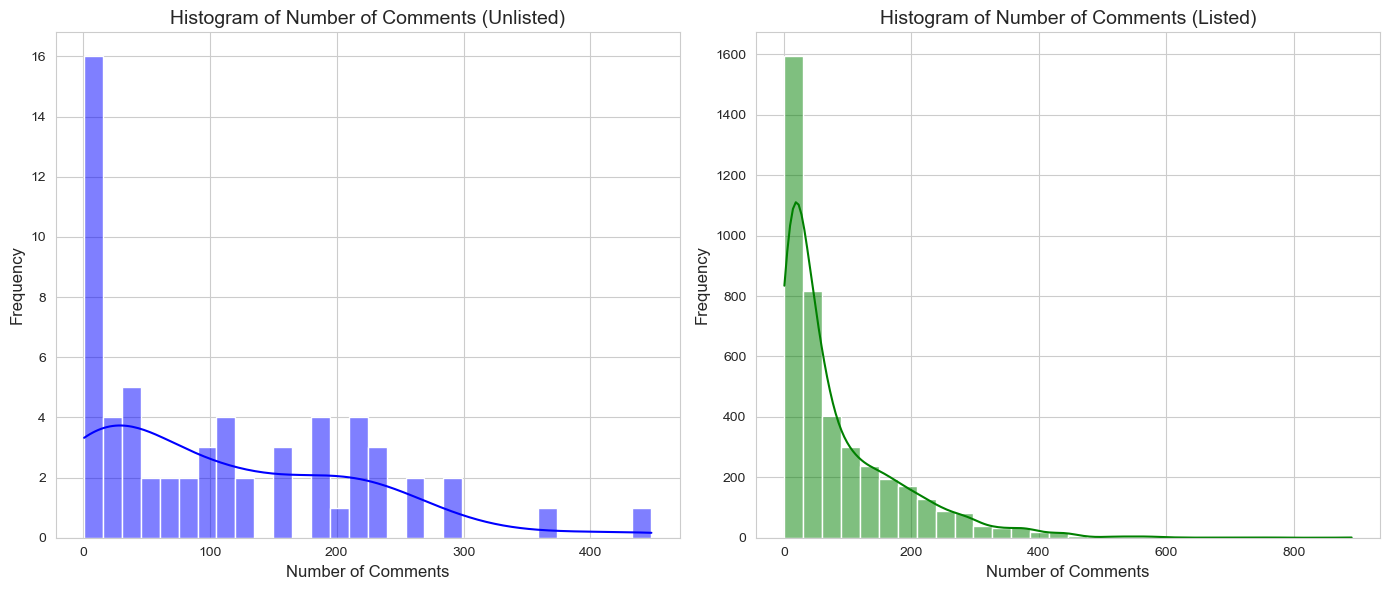

In [64]:
sns.set_style("whitegrid")
sns.set_palette("viridis")
comments_count = df_train_reviews.groupby('index').count()['comments']
merged_data = df_train_reviews.merge(df_train, left_on='index', right_index=True)
listed_comments = comments_count[merged_data['unlisted'] == 0]
unlisted_comments = comments_count[merged_data['unlisted'] == 1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=unlisted_comments, color='blue', ax=axes[0], kde=True, bins=30)
axes[0].set_xlabel('Number of Comments', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram of Number of Comments (Unlisted)', fontsize=14)
axes[0].grid(True)
sns.histplot(data=listed_comments, color='green', ax=axes[1], kde=True, bins=30)
axes[1].set_xlabel('Number of Comments', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Histogram of Number of Comments (Listed)', fontsize=14)
axes[1].grid(True)
plt.tight_layout()
plt.show()

Now let's see how many properties have no comments.

Proportion of unlisted properties with no comments: 0.84
Proportion of listed properties with no comments: 0.12


c:\Users\Arda Kaykusuz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


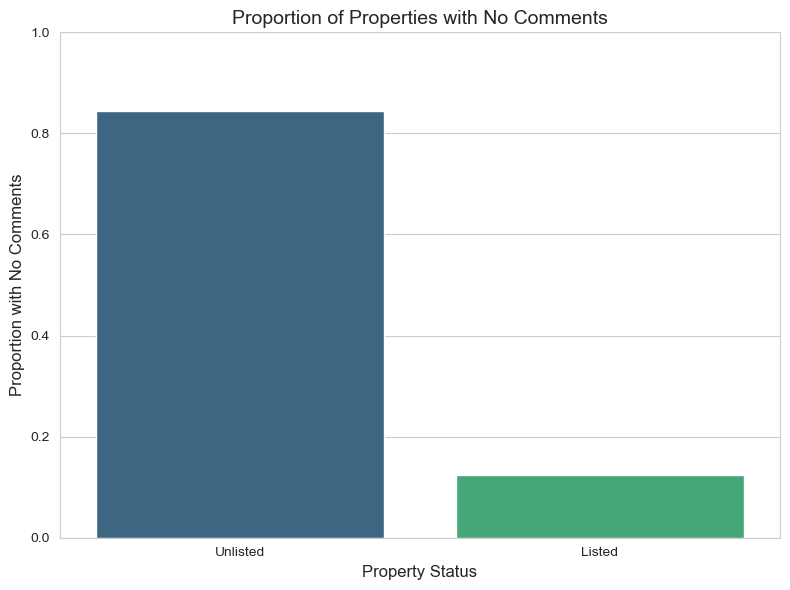

In [66]:
properties_without_comments = df_train[~df_train.index.isin(df_train_reviews['index'])]
no_comments_unlisted = properties_without_comments[properties_without_comments['unlisted'] == 1].shape[0]
total_unlisted = df_train[df_train['unlisted'] == 1].shape[0]
no_comments_listed = properties_without_comments[properties_without_comments['unlisted'] == 0].shape[0]
total_listed = df_train[df_train['unlisted'] == 0].shape[0]
unlisted_proportion = no_comments_unlisted / total_unlisted
listed_proportion = no_comments_listed / total_listed
print(f'Proportion of unlisted properties with no comments: {unlisted_proportion:.2f}')
print(f'Proportion of listed properties with no comments: {listed_proportion:.2f}')
proportions = [unlisted_proportion, listed_proportion]
labels = ['Unlisted', 'Listed']
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=labels, y=proportions, palette="viridis")
ax.set_xlabel('Property Status', fontsize=12)
ax.set_ylabel('Proportion with No Comments', fontsize=12)
ax.set_title('Proportion of Properties with No Comments', fontsize=14)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


## Languages
After analyzed the data, it was seen that the dataset consist of multiple languages. Let's see the common languages and their distributions.
To see the languages of columns(host about, description), let's create plot them.

In [67]:
def language_detection(x):
  try:
    return detect(x)
  except:
    return 'error'

def plot_languages(lang_data):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.countplot(y=lang_data, order=lang_data.value_counts().index.tolist(), ax=ax, palette="magma")
    ax.set_xlabel('Frequency', fontsize=12)
    ax.set_ylabel('Languages', fontsize=12)
    ax.set_title('Language Distribution', fontsize=14)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=10)
    plt.tight_layout()
    plt.show()


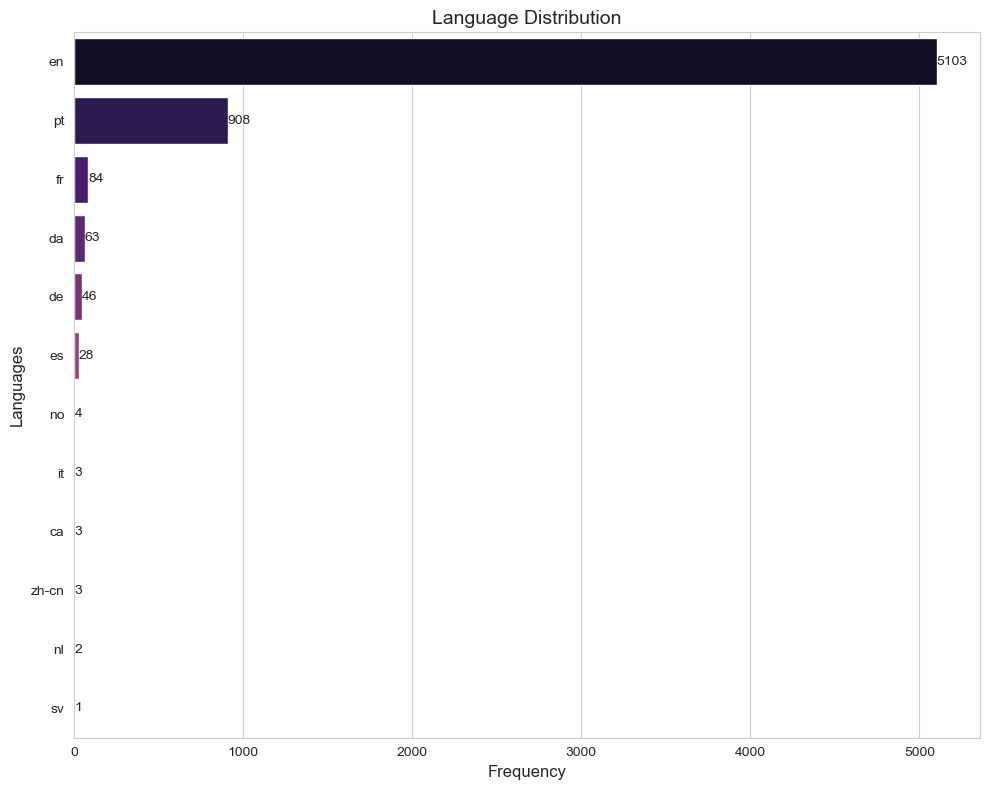

In [ ]:
description_lang = df_train['description'].apply(lambda x: language_detection(str(x)))
plot_languages(description_lang)

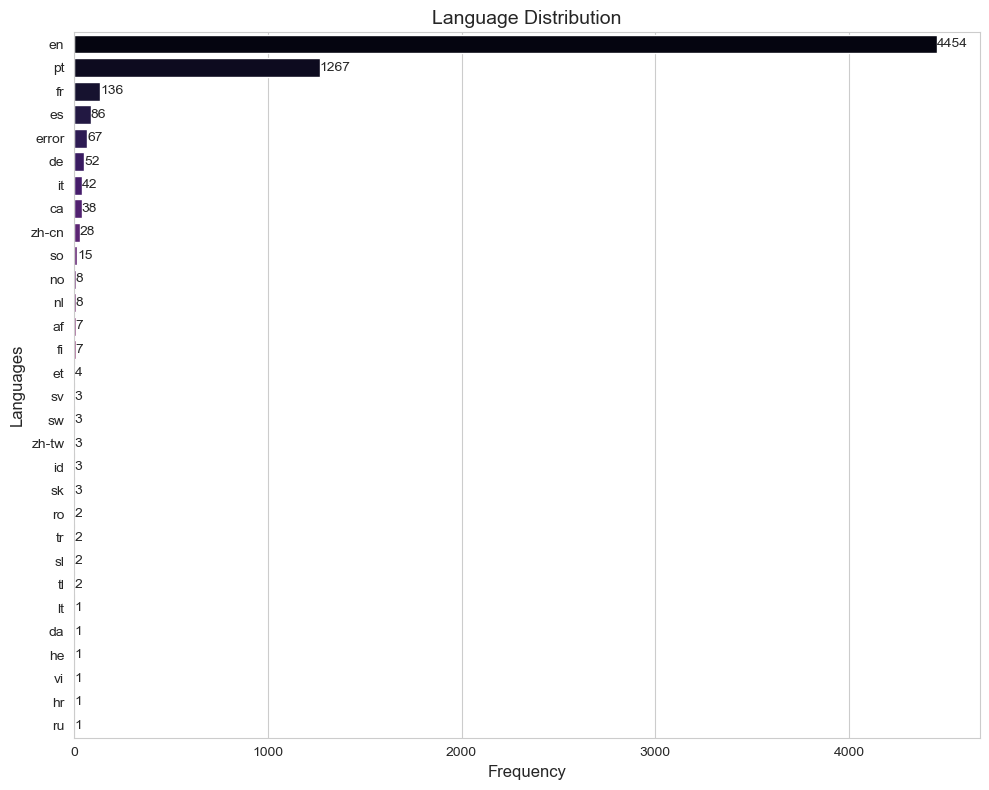

In [ ]:
host_lang = df_train['host_about'].apply(lambda x: language_detection(str(x)))
plot_languages(host_lang)

In [ ]:
#reviews_lang = df_train_reviews['comments'].apply(lambda x: language_detection(str(x)))
#plot_languages(reviews_lang)

### Analyzing Text Lengths


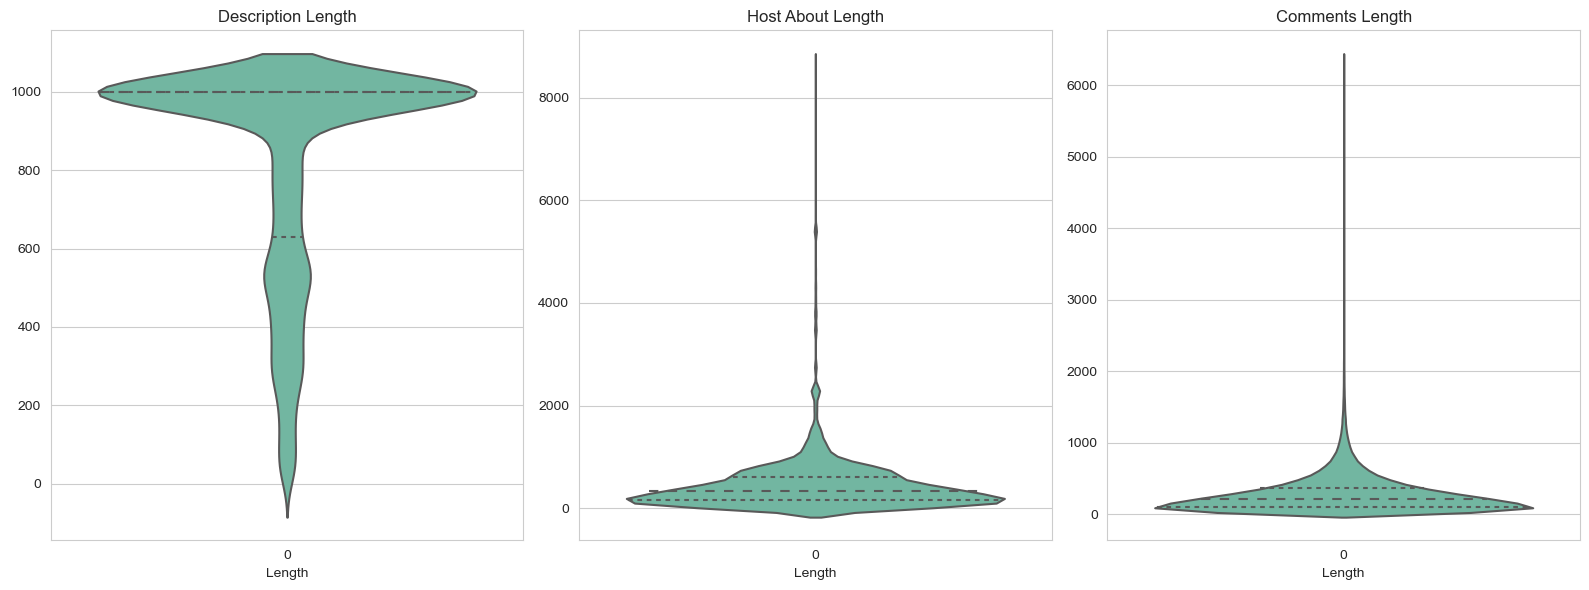

In [ ]:
length_of_description = df_train['description'].apply(lambda x: len(str(x))).reset_index(drop=True)
length_of_host_about = df_train['host_about'].apply(lambda x: len(str(x))).reset_index(drop=True)
length_of_comments = df_train_reviews['comments'].apply(lambda x: len(str(x))).reset_index(drop=True)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

def plot_violinplot(feature, ax, title):
    sns.violinplot(data=feature, ax=ax, inner='quartile', palette='Set2')
    ax.set_title(title)
    ax.set_xlabel('Length')

plot_violinplot(length_of_description, axes[0], 'Description Length')
plot_violinplot(length_of_host_about, axes[1], 'Host About Length')
plot_violinplot(length_of_comments, axes[2], 'Comments Length')

plt.tight_layout()
plt.show()

### Count of Words

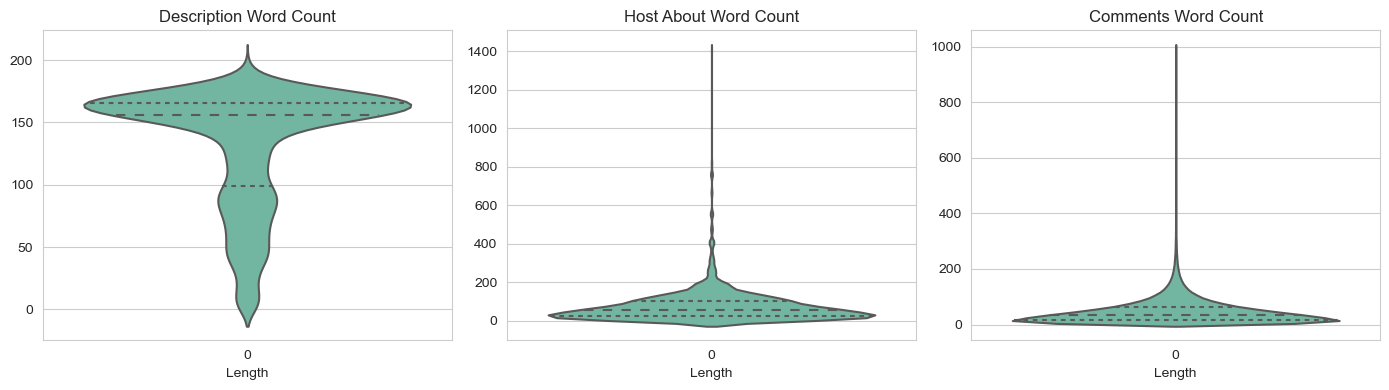

In [ ]:
description_word_count = df_train['description'].str.split().apply(len).reset_index(drop=True)
host_about_word_count = df_train['host_about'].str.split().apply(len).reset_index(drop=True)
comments_word_count = df_train_reviews['comments'].str.split().apply(len).reset_index(drop=True)
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

plot_violinplot(description_word_count, axes[0], 'Description Word Count')
plot_violinplot(host_about_word_count, axes[1], 'Host About Word Count')
plot_violinplot(comments_word_count, axes[2], 'Comments Word Count')

plt.tight_layout()
plt.show()

### Word Frequency


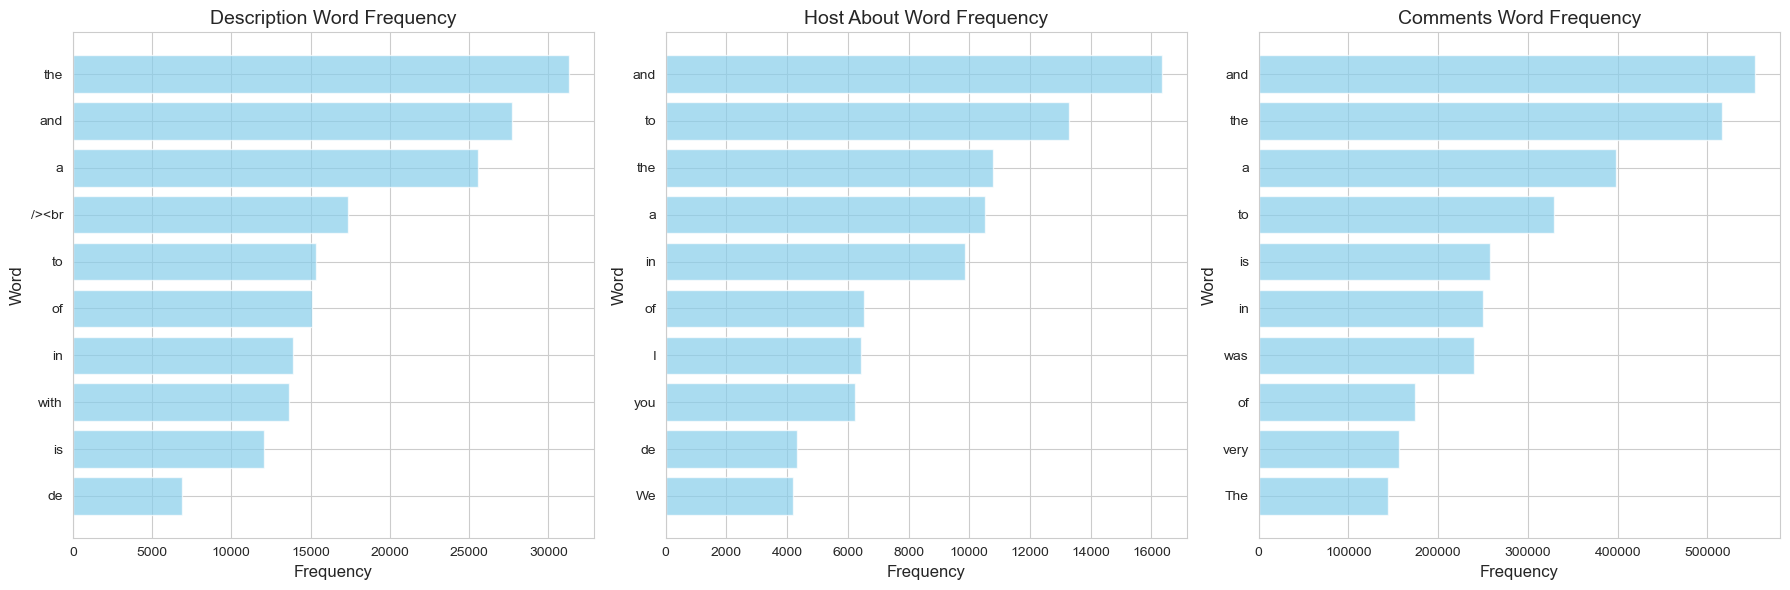

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_word_freq(words, title, ax):
    freq = pd.Series(words).value_counts()
    axes[ax].barh(freq.index[:10], freq[:10], align='center', alpha=0.7, color='skyblue')  
    axes[ax].set_title(title, fontsize=14)  
    axes[ax].set_xlabel('Frequency', fontsize=12)  
    axes[ax].set_ylabel('Word', fontsize=12)

description_word_list = ' '.join(df_train['description']).split()
plot_word_freq(description_word_list, 'Description Word Frequency', 0)

host_about_word_list = ' '.join(df_train['host_about']).split()
plot_word_freq(host_about_word_list, 'Host About Word Frequency', 1)

comments_word_list = ' '.join(df_train_reviews['comments']).split()
plot_word_freq(comments_word_list, 'Comments Word Frequency', 2)

plt.tight_layout()
plt.show()


Stop words are so common in the dataset. We will remove them in the following parts. Since they dont give us any contribution for our analysis. 

### Strange symbols
As mentioned in the previous codes, there are couple of strange symbols. Let's discover them.

#### Markup and HTML symbols

In [69]:
def htmls(text):
    pattern = r'<[^>]+>|&[a-zA-Z]+;|\*\*|__'
    markup_symbols = re.findall(pattern, text)
    return markup_symbols
def aggregate_markup_symbols(df, columns):
    all_symbols = set()
    for column in columns:
        symbols = df[column].apply(htmls)
        all_symbols.update(string for sublist in symbols for string in sublist)
    return all_symbols
columns_to_process_df_train = ['description', 'host_about']
columns_to_process_df_train_reviews = ['comments']

symbols_df_train = aggregate_markup_symbols(df_train, columns_to_process_df_train)
symbols_df_train_reviews = aggregate_markup_symbols(df_train_reviews, columns_to_process_df_train_reviews)

# Combine the results if needed
combined_symbols = symbols_df_train.union(symbols_df_train_reviews)
combined_symbols


{'&amp;',
 '&lt;',
 '&quot;',
 '**',
 '< 1 min walk. The Avenida da Liberdade is 10-15 min walk. On the final day,  our flight was late in the evening and Sara was very understanding and told us to checkout whenever we wanted. That was very helpful.<br/>',
 '< 1mbps, making video calls impossible<br/>',
 '< 5 minutes).<br/>',
 '< <br/>',
 '<->',
 '</a>',
 '</b>',
 '</div>',
 '<1 mbps). During the day it was also quite noisy as they are building an apartment a few houses up which meant we could hear constant drilling which kind of got on our nerves.<br/>',
 '<10 minute walk to the train station. We walked to some of the main attractions I.e. Sintra Palace and the Castle of the Moors and could have walked the rest but decided on a hop on hop off bus because our legs were getting tired! <br/>',
 '<10 minutes walk from the apartment and a pretty easy way to/from the airport. <br/>',
 '<10e pour 3..),<br/>',
 '<15mins.<br/>',
 '<1Mbit/s).<br/>',
 '<1min from the beach and in the centre for 

The all strange symbols were detected. They are going to be deleted.

#### Currency Symbols

Detecting money symbols are also essential for our analysis. We need to define them and in the preprocessing we will remove all of them.

In [70]:
currency_pattern = r'[$€£¥] \d+|\b\d+\s*[€€]\b|\b[€€]\s*\d+\b|(?:[$€£¥]\d+|\d+[$€£¥])'
matching_descriptions = df_train['description'][df_train['description'].str.contains(currency_pattern)]
print(matching_descriptions)


index
30      Cozy two bedroom house near Ericeira. Up to 4 ...
55      Spacious apartment in the heart of Lisbon. Up ...
117     This apartment is located in the city center w...
118     New apartment in a quiet and safe residential ...
149     Amazing apartment in the heart of the city!<br...
                              ...                        
6178    Perfect Residence Appartement with pool and Pa...
6200    Located a comfortable 15 minutes by train from...
6201    Spacious and bright studio apartment in the ce...
6216    DESINFECTED FLAT!<br />Beautiful and typical c...
6239    Add a touch of cosiness to your Lisbon vacatio...
Name: description, Length: 277, dtype: object


In [71]:
df_train.loc[55, 'description']

"Spacious apartment in the heart of Lisbon. Up to 4 guests!<br /><br /><b>The space</b><br />Welcome to Feels Like Home Baixa Elegant Apartment!<br /><br />This amazing apartment is located right in the center of Lisbon, close to all the shops and restaurants. Here you'll find two spacious bedrooms with a double bed, two bathrooms, a fully equipped kitchen and a bright living room with dining area.<br /><br /><b>Other things to note</b><br />A confirmation voucher will be sent to your e-mail with all the important details about your reservation and Feels Like Home additional services.<br />Guests must pick-up the keys at the Welcome Centre located in Lisbon. Arrivals from 23:00 (11pm) to 06:00 (06am), a late check-in fee of EUR 30 shall be applied (paid in cash at check-in).<br />All guests must provide their ID or Passport Information at the time of check-in.<br />Please note that a mandatory touristic tax will be included in the final price (2€/person/day). If it has not been charged

In [72]:
df_train_reviews['comments'][df_train_reviews['comments'].str.contains(currency_pattern)]

18        Je trouve le logement cher pour une auberge de...
446       I made a booking with Airbnb from the 21 Febru...
956       Très bon emplacement pour visiter Lisbonne à p...
1569      Der Garten und der Pool sind ein Traum. Den Po...
2421      We stayed for a week at this beautiful apartme...
                                ...                        
360861    :-) Very very well located in walking distance...
360945    Wir haben unseren Aufenthalt ins Gonçalo’s Woh...
361099    Ana's place is just 5 mins walk away from the ...
361233    Ana was great from the start. Consistent, frie...
361239    Ana’s place is perfect for your trip to Lisbon...
Name: comments, Length: 1538, dtype: object

In [73]:
df_train_reviews.loc[360861, 'comments']

":-) Very very well located in walking distance to the metro and the historic centre of the city. Spacious, clean, with comfortable bed and soft towels, hot water with great pressure 24/7 and nicely decorated! Margarida who welcomed us was very friendly and communication was easy via whatsapp.<br/>:-( We asked to check in at 12.30 instead of 14.00 and there was an extra cost of 20€ (we didn't accept-we just had a coffee nearby). Also there are a few things missing to make the apartment perfect such as a fullbody mirror, a suitcase rack and an extra blanket for the cold nights!<br/>In general we had a great time and would recommend it to friends! "

As seen in the above our code works and we filtered the raws that contain currency signs

# Data Preprocessing

## Duplicates Handling

The duplicates found during exploration will now be handled.

In [74]:
df_train[df_train.duplicated()]

,description,host_about,unlisted
index,,,
232,Nesha Guesthouse Lisbon is a surf & beach orie...,I'm an enthusiastic and active person who love...,0
550,We are The Salty Pelican Yoga & Surf Retreat. ...,Hello… We are The Salty Pelican Surf & Yoga Re...,0
726,Hospede-se em um local privilegiado e aconcheg...,"Life is to be lived, good friends, good food, ...",0
977,This gorgeous and spacious room located right ...,Olá ! Sou a Carmo - vivo em Lisboa na Lapa bai...,0
993,Located in the heart of Lisbon (in the histori...,Founded by travel enthusiasts (just like you) ...,1
...,...,...,...
6153,Arrendamento mensal. Quarto mobilado e climati...,Hello! We are Luzeiros Suites located on Aveni...,1
6182,Our apartment is situated in the heart of down...,The Sonel Investe group has a collection of qu...,0
6183,"Newly renovated studio apartment, privileged l...",Founded by travel enthusiasts (just like you) ...,1


In [77]:
mapping = df_train.groupby(['description', 'host_about', 'unlisted']).ngroup()
df_train_reviews['index'] = df_train_reviews['index'].map(mapping.to_dict())
df_train.set_index(mapping.values, inplace = True)
df_train.drop_duplicates(inplace = True)

In [78]:
df_train.shape

(6056, 3)

### Removing and Handling Missing Values

In [79]:
df_train.loc[df_train['description'].str.startswith('<b>License number</b><br />'), 'description'] = ""
df_test.loc[df_test['description'].str.startswith('<b>License number</b><br />'), 'description'] = ""

In [81]:

mask = df_train['description'].str.contains("<b>License number</b><br />").notna()
selected_descriptions = df_train.loc[mask, 'description'].str.extract(r'(.*)<b>License number</b><br />')
filtered_descriptions = selected_descriptions.loc[(selected_descriptions[0].str.len() < 20) & (selected_descriptions[0].str.len() > 0), 0]
df_train.loc[filtered_descriptions.index, 'description'] = ""
mask = df_test['description'].str.contains("<b>License number</b><br />").notna()
selected_descriptions = df_test.loc[mask, 'description'].str.extract(r'(.*)<b>License number</b><br />')
filtered_descriptions = selected_descriptions.loc[(selected_descriptions[0].str.len() < 20) & (selected_descriptions[0].str.len() > 0), 0]
df_test.loc[filtered_descriptions.index, 'description'] = ""

As mentioned we will remove punctionations. and weird short text for our analysis. 

In [82]:
short_words=['good', 'top', 'ok', 'bom', 'nice', 'love', 'like']
short_expressions= df_train_reviews[df_train_reviews['comments'].apply(lambda x: len(str(x)) < 5 and str(x).lower() not in short_words and emoji.emoji_count(str(x))==0)]
short_expressions

,index,comments
275,4214,.
317,1988,I
682,5985,.
698,5985,q
1129,2568,-
...,...,...
359303,1854,.
359456,1781,1
359527,1781,5/5
359648,1781,Nan


In [83]:
df_train_reviews.loc[short_expressions.index, 'comments'] = ""

### Text Standardization

#### Emoji Handling

While examining data, we saw couple of emojis. Instead of removing them we decided to use them, doing encoding. They can give good results for our analysis.

In [84]:

emoji.demojize(str('It is Group 11 text mining project 😂'))

'It is Group 11 text mining project :face_with_tears_of_joy:'

As seen in above our emoji library convert them to the text. We will reduce underscores and semi columns not to impact our analysis. 

#### Removing Punctuations 

In [85]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
def count_special_characters(string, char_counts):
  for char in string:
      if not char.isalnum() and char not in punctuation:
          char_counts[char] = char_counts.get(char, 0) + 1

In [ ]:
invalid_chars = list(set(description_invalid_chars + host_invalid_chars + reviews_invalid_chars))
unicode_pattern = '|'.join(map(re.escape, invalid_chars))

In [ ]:
html_mkdown_regex = r'(?!<[ \d$])<[^>]+>|&[a-zA-Z]+;|\*\*+|__'

In [87]:
def replace_money(text):
  money_pattern = r'(?:[$€£¥]\d+|\d+[$€£¥])|[$€£¥] \d+|\b\d+\s*[$€£¥]\b|\b[$€£¥]\s*\d+\b'
  cleaned_text = re.sub(money_pattern, 'value', text)
  return cleaned_text
def replace_urls(text):
  url_pattern = r'http\S+|www\S+'
  cleaned_text = re.sub(url_pattern, 'url', text)
  return cleaned_text
def replace_emails(text):
  email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
  cleaned_text = re.sub(email_pattern, 'email', text)
  return cleaned_text
def remove_license_number(text):
  plus_symbol_pattern = r'license number [a-zA-Z0-9]*'
  cleaned_text = re.sub(plus_symbol_pattern, '', text)
  return cleaned_text

### Stop Words Handling

In [90]:
stop_words = {
    "en" : set(stopwords.words('english')),
    "es" : set(stopwords.words('spanish')),
    "pt" : set(stopwords.words('portuguese')),
    "fr" : set(stopwords.words('french')),
    "fi" : set(stopwords.words('finnish')),
    "de" : set(stopwords.words('german')),
    "da" : set(stopwords.words('danish')),
    "no" : set(stopwords.words('norwegian')),
    "it" : set(stopwords.words('italian')),
    "nl" : set(stopwords.words('dutch')),
    "ru" : set(stopwords.words('russian')),
    "ro" : set(stopwords.words('romanian')),
    "ca" : set(stopwords.words('catalan')),
    "sv" : set(stopwords.words('swedish'))
}

In [92]:
def remove_stop_words(text, language):
  stop = stop_words.get(language, None)
  if stop:
    return " ".join([word for word in text.split() if word not in stop])
  else:
    return text

### Contractions

In [91]:
words_with_contractions = ["ain't", "I'm", "you're"]
for word in words_with_contractions:
  print(contractions.fix(word))

are not
I am
you are


### Stemming

In [ ]:
stemmers = {
    "en": SnowballStemmer("english"),
    "es": SnowballStemmer("spanish"),
    "pt": SnowballStemmer("portuguese"),
    "fr": SnowballStemmer("french"),
    "fi": SnowballStemmer("finnish"),
    "de": SnowballStemmer("german"),
    "da": SnowballStemmer("danish"),
    "no": SnowballStemmer("norwegian"),
    "it": SnowballStemmer("italian"),
    "nl": SnowballStemmer("dutch"),
    "ru": SnowballStemmer("russian"),
    "ro": SnowballStemmer("romanian"),
    "sv": SnowballStemmer("swedish")
}


In [ ]:
def stem_text(text, language):
  stemmer = stemmers.get(language, None)
  if stemmer:
    return " ".join([stemmer.stem(word) for word in text.split()])
  else:
    return text

### Text Standardization - Preparing Final Datasets

In [ ]:
def clean_corpus(corpus, stemming = False):
  new_corpus = []
  for text in tqdm(corpus):
    text = text.lower() # For lowercase
    if text == "": 
      new_corpus.append(text)
      continue
    text = emoji.demojize(str(text)) # emoji handling
    text = text.replace(':', ' : ') 
    text = text.replace('_', ' _ ')
    text = re.sub(unicode_pattern, '', text)
    text = re.sub(r'(?!<[ \d$])<[^>]+>|&[a-zA-Z]+;|\*\*|__', ' ', text) #html
    text = replace_money(text)
    text = replace_emails(text)
    text = replace_urls(text)
    text = remove_license_number(text)
    language = language_detection(text)
    text = remove_stop_words(text, language)
    if language == "en":
      text = contractions.fix(text)
    text = re.sub(r'\b(\w+)[.,!?](\w+)\b', r'\1 \2', text)
    new_text = []
    for word in text.split():
      new_text.append(''.join(char for char in word if char.isalnum()))
    text = ' '.join(new_text)
    text = re.sub(r'\b\w*\d+\w*\b', '', text)
    pattern = r'\b(?:[ivxlcdm]+\b|\b[ivxlcdm]+)(?=\s|$)'
    text = re.sub(pattern, '', text)
    if stemming:
      text = stem_text(text, language)
    new_corpus.append(text)
  return new_corpus

In [ ]:
df_train_copy = df_train.copy()
df_train_copy['description'] = clean_corpus(df_train['description'], stemming = True)
df_train_copy['host_about'] = clean_corpus(df_train['host_about'], stemming = True)
df_train_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\df_train_copy.csv')

100%|██████████| 6056/6056 [2:06:10<00:00,  1.25s/it]  


In [ ]:
# Test dataset with stemming
df_test_copy = df_test.copy()
df_test_copy['description'] = clean_corpus(df_test['description'], stemming = True)
df_test_copy['host_about'] = clean_corpus(df_test['host_about'], stemming = True)
df_test_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\test_cleaned_stemming.csv')

100%|██████████| 695/695 [30:00<00:00,  2.59s/it]  


In [ ]:
# Train dataset without stemming
df_train_copy = df_train.copy()
df_train_copy['description'] = clean_corpus(df_train['description'], stemming = False)
df_train_copy['host_about'] = clean_corpus(df_train['host_about'], stemming = False)
df_train_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train_cleaned.csv')

100%|██████████| 6056/6056 [1:57:08<00:00,  1.16s/it]  


In [ ]:
df_test_copy = df_test.copy()
df_test_copy['description'] = clean_corpus(df_test['description'], stemming = False)
df_test_copy['host_about'] = clean_corpus(df_test['host_about'], stemming = False)
df_test_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\test_cleaned.csv')

100%|██████████| 695/695 [15:33<00:00,  1.34s/it]  


In [ ]:
df_train_reviews_copy = df_train_reviews.copy()
df_train_reviews_copy['comments'] = clean_corpus(df_train_reviews['comments'], stemming = False)
df_train_reviews_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train_reviews_cleaned.csv')

100%|██████████| 361281/361281 [51:42:55<00:00,  1.94it/s]    


In [ ]:
df_test_reviews_copy = df_test_reviews.copy()
df_test_reviews_copy['comments'] = clean_corpus(df_test_reviews['comments'], stemming = False)
df_test_reviews_copy.to_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\test_reviews_cleaned.csv')

100%|██████████| 41866/41866 [4:53:25<00:00,  2.38it/s]   


In [ ]:
df_train_cleaned = pd.read_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train_cleaned.csv', index_col = 0)
df_train_cleaned.head()

,description,host_about,unlisted
5271,shared mixed room hostel shared bathroom locat...,alojamiento local registro,False
3630,espaço fica perto parque guardo sardinha estef...,friendly host try always around need anything ...,True
5453,trafarias house cozy familiar villa facilities...,social person liking communicate reading trave...,True
814,apartamento charmoso chiado largo carro traves...,hello portuguese love meet people around word ...,False
2850,joli appartement bordure mer min a pied plage ...,famille deux enfants ans habité pendant plusie...,False


In [ ]:
df_train_reviews_cleaned = pd.read_csv('C:\\Users\\Arda Kaykusuz\\Desktop\\text mining\\train_reviews_cleaned.csv', index_col = 0)
df_train_reviews_cleaned.head()

,index,comments
0,5271,cozy comfortable house stay in never worry saf...
1,5271,good
2,5271,first hostel experience say pretty hard beat p...
3,5271,kostet neu deshalb funktionierte tadellos schn...
4,5271,fine dorm think people staying far less bathro...


In [ ]:
df_train_cleaned = df_train_cleaned.fillna('')
df_train_reviews_cleaned = df_train_reviews_cleaned.fillna('')

## Word Frequency


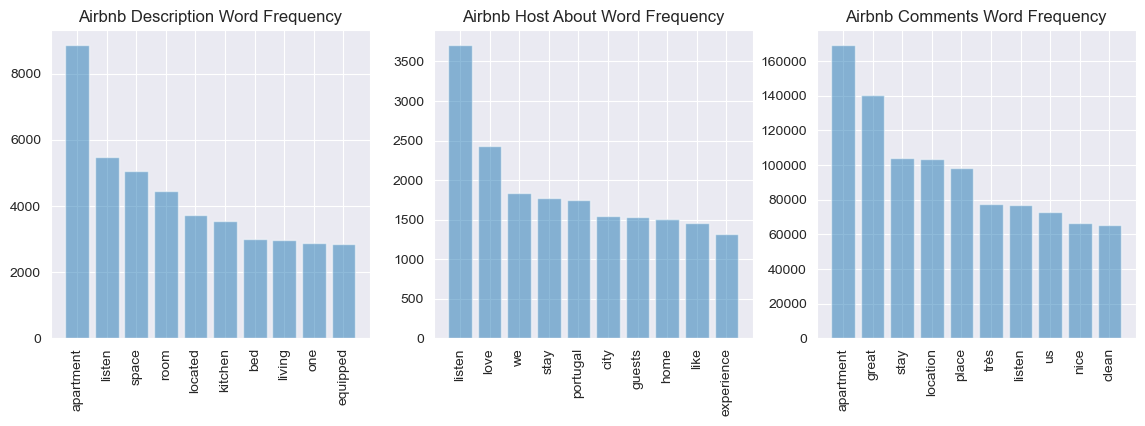

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
description_words = ' '.join(df_train_cleaned['description']).split()
word_freq(description_words, 'Airbnb Description Word Frequency', 0)
host_about_words = ' '.join(df_train_cleaned['host_about']).split()
word_freq(host_about_words, 'Airbnb Host About Word Frequency', 1)
comments_words = ' '.join(df_train_reviews_cleaned['comments']).split()
word_freq(comments_words, 'Airbnb Comments Word Frequency', 2)
plt.show()

### N-Grams Frequency

In [ ]:
def get_top_10_ngram(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
top_n_bigrams_description = get_top_10_ngram(df_train_cleaned["description"], 2)
top_n_bigrams_host_about = get_top_10_ngram(df_train_cleaned["host_about"], 2)
top_n_bigrams_comments = get_top_10_ngram(df_train_reviews_cleaned["comments"], 2)

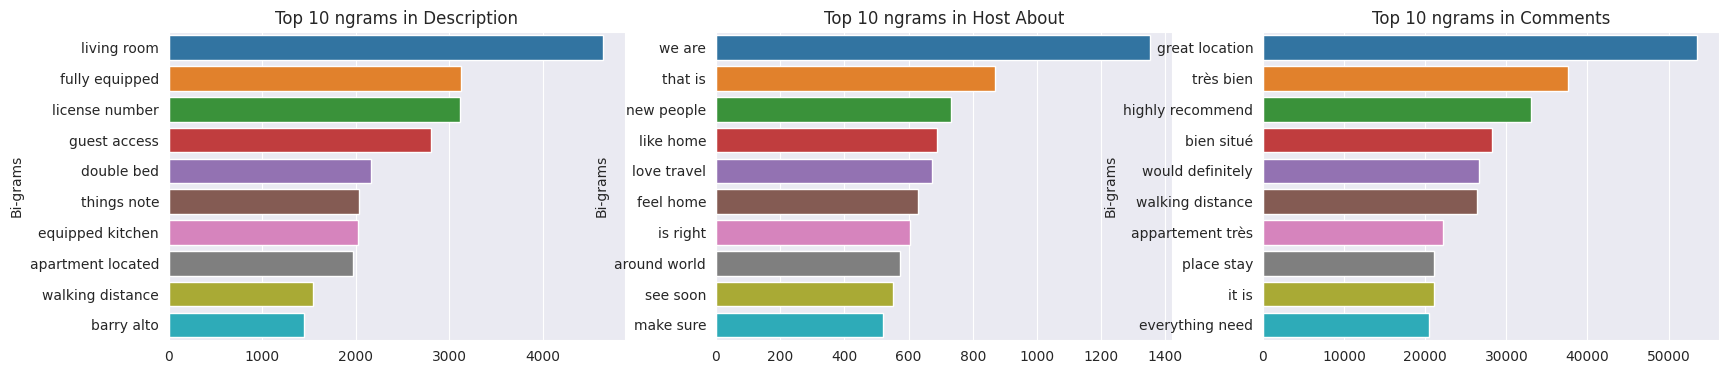

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 4))
def plot_top_ngrams(top_ngrams, ax, title):
  x,y = map(list,zip(*top_ngrams))
  sns.barplot(x=y,y=x, ax = ax)
  ax.set_ylabel('Bi-grams')
  ax.set_title(title)

plot_top_ngrams(top_n_bigrams_description, axes[0], 'Top 10 ngrams in Description')
plot_top_ngrams(top_n_bigrams_host_about, axes[1], 'Top 10 ngrams in Host About')
plot_top_ngrams(top_n_bigrams_comments, axes[2], 'Top 10 ngrams in Comments')

### Word Clouds

In [ ]:
listed_properties = df_train_cleaned[df_train_cleaned['unlisted'] == 0]
unlisted_properties = df_train_cleaned[df_train_cleaned['unlisted'] == 1]
def plot_word_cloud(listed_all_words, unlisted_all_words):
  wordcloud_listed = WordCloud(width=800, height=400, background_color='white').generate(listed_all_words)
  wordcloud_unlisted = WordCloud(width=800, height=400, background_color='white').generate(unlisted_all_words)
  fig, axes = plt.subplots(1, 2, figsize=(10, 10))
  axes[0].imshow(wordcloud_listed, interpolation='bilinear')
  axes[0].set_title('Word Cloud for Listed Properties')
  axes[0].axis('off')

  axes[1].imshow(wordcloud_unlisted, interpolation='bilinear')
  axes[1].set_title('Word Cloud for Unlisted Properties')
  axes[1].axis('off')
  plt.show()

Description

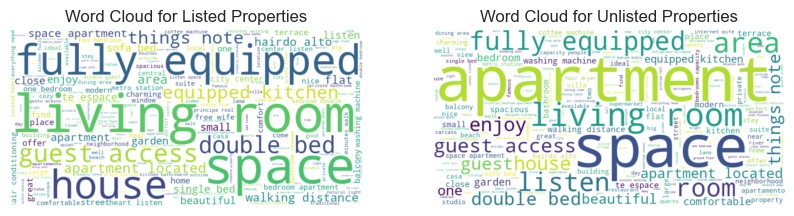

In [ ]:
listed_all_words_description = ' '.join(listed_properties['description'])
unlisted_all_words_description = ' '.join(unlisted_properties['description'])

plot_word_cloud(listed_all_words_description, unlisted_all_words_description)

Host About

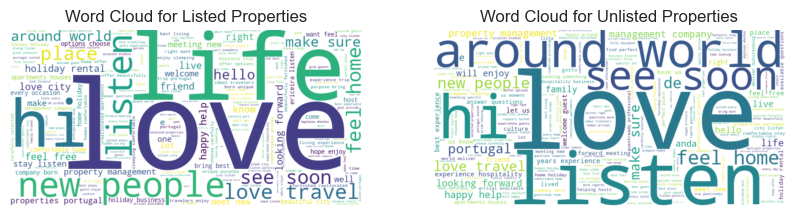

In [ ]:
listed_all_words_host_about = ' '.join(listed_properties['host_about'])
unlisted_all_words_host_about = ' '.join(unlisted_properties['host_about'])

plot_word_cloud(listed_all_words_host_about, unlisted_all_words_host_about)

### Sentiment analysis

In [123]:
def predict_sentiment(text, analyzer):
  sentiment_scores = analyzer.polarity_scores(text)
  compound_score = sentiment_scores['compound']
  if compound_score >= 0.05:
      sentiment = 'Positive'
  elif compound_score <= -0.05:
      sentiment = 'Negative'
  else:
      sentiment = 'Neutral'
  return sentiment

In [125]:

analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
analyzer = SentimentIntensityAnalyzer()
df_train_reviews_cleaned['sentiment'] = df_train_reviews_cleaned['comments'].progress_apply(predict_sentiment, analyzer = analyzer)

100%|██████████| 361281/361281 [01:09<00:00, 5174.92it/s]


In [126]:
df_train_reviews_cleaned.head()

,index,comments,sentiment
0,5271,cozy comfortable house stay in never worry saf...,Positive
1,5271,good,Positive
2,5271,first hostel experience say pretty hard beat p...,Positive
3,5271,kostet neu deshalb funktionierte tadellos schn...,Neutral
4,5271,fine dorm think people staying far less bathro...,Positive


In [127]:
sentiment_counts = df_train_reviews_cleaned.groupby(['index', 'sentiment']).size().reset_index(name='count')
pivot_table = sentiment_counts.pivot_table(index='index', columns='sentiment', values='count', fill_value=0)
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None
train_df_merged = df_train.merge(pivot_table, how='left', left_index=True, right_on='index').reset_index().fillna(0)

Text(0.5, 1.0, 'Proportion of Sentiments in Reviews of Unlisted Properties')

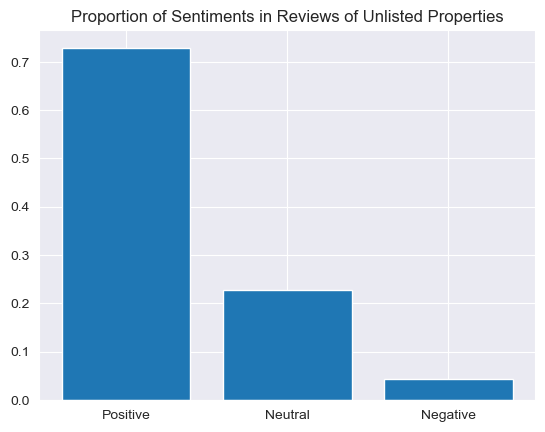

In [128]:
unlisted = train_df_merged[train_df_merged['unlisted'] == 1]
column_sums = unlisted[['Positive', 'Neutral', 'Negative']].sum()
proportions = column_sums / column_sums.sum()
plt.bar(proportions.index, proportions.values)
plt.title('Proportion of Sentiments in Reviews of Unlisted Properties')

Text(0.5, 1.0, 'Proportion of Sentiments in Reviews of Listed Properties')

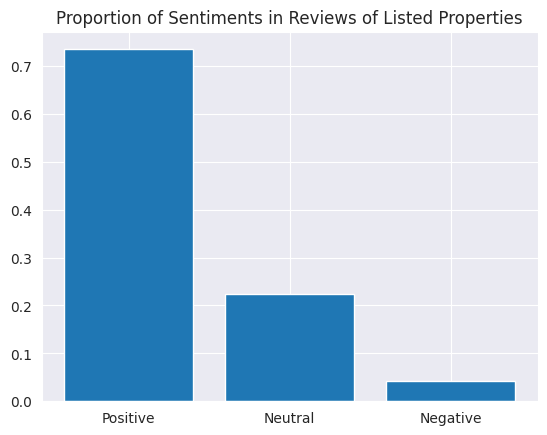

In [ ]:
listed = train_df_merged[train_df_merged['unlisted'] == 0]
column_sums = listed[['Positive', 'Neutral', 'Negative']].sum()
proportions = column_sums / column_sums.sum()
plt.bar(proportions.index, proportions.values)
plt.title('Proportion of Sentiments in Reviews of Listed Properties')